# Text Mining

### Sentiment Analysis based on imdb user-reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## 1. Data Import and Preliminary Exploration

#### Lets take a peek at the imdb dataset and explore

In [2]:
fileDirectory1 = "Master_Reviews.csv"

In [3]:
#sheetName1 = "Sheet1"

In [4]:
imdb= pd.read_csv(fileDirectory1,encoding='utf-8').loc[:10000]

In [5]:
#this dataset was obtained from UCI Machinelearning repository

In [6]:
#imdb = pd.read_csv('imdb_labelled.txt', sep = '\t', header = None) 

In [7]:
imdb.head(5)

,rating,review
0,1,3M is a large company with many opportunities ...
1,0,"management completely incompetent, the worst p..."
2,0,"People lazy, will do anything to get out of wo..."
3,0,"best work counts for nothing. After 22 years, ..."
4,0,Been with 3M for 12 years. Used to be a good p...


**Lets name the columns**

In [8]:
imdb.columns = ['rating', 'review']
imdb.head(3)

,rating,review
0,1,3M is a large company with many opportunities ...
1,0,"management completely incompetent, the worst p..."
2,0,"People lazy, will do anything to get out of wo..."


In [9]:
imdb['review'] = imdb['review'].str.replace('\d+','')

In [10]:
len(imdb.index)

10001

**Lets name the rows as well**

In [11]:
rnames = ['R' +str(i) for i in range(0,imdb.shape[0])]
imdb.index = rnames
imdb.head(3)

,rating,review
R0,1,M is a large company with many opportunities a...
R1,0,"management completely incompetent, the worst p..."
R2,0,"People lazy, will do anything to get out of wo..."


In [12]:
imdb.shape

(10001, 2)

**Q. How many positive & negative sentiment reviews are there**

In [13]:
imdb['rating'].value_counts()

1    8313
0    1688
Name: rating, dtype: int64

**Before doing text mining, can we think of any other features, that can predict the sentiment. **Lets create a new column, Length which counts the total number of characters in the review****

In [14]:
imdb['Length'] = imdb['review'].apply(len)
#imdb['Length'] = imdb['Description'].str.len()

In [15]:
imdb.head(3)

,rating,review,Length
R0,1,M is a large company with many opportunities a...,234
R1,0,"management completely incompetent, the worst p...",206
R2,0,"People lazy, will do anything to get out of wo...",185


In [16]:
# sns.boxplot(imdb['rating'], imdb['Length'])
# plt.show()

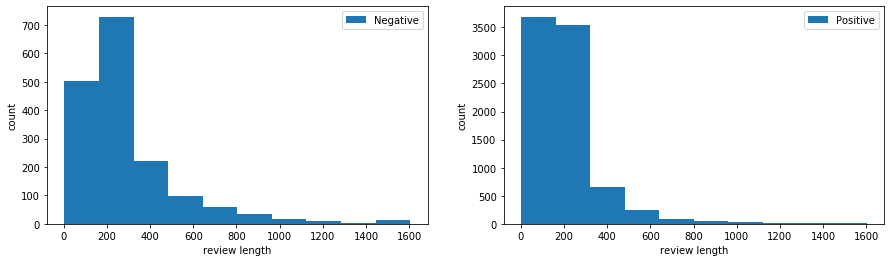

In [17]:
fig, ax = plt.subplots(1,2, figsize = (15,4))

ax[0].hist(imdb.loc[imdb['rating'] == 0, 'Length'], label = 'Negative')
ax[1].hist(imdb.loc[imdb['rating'] == 1, 'Length'], label = 'Positive')
ax[0].set_xlabel('review length')
ax[0].set_ylabel('count')
ax[1].set_xlabel('review length')
ax[1].set_ylabel('count')
ax[0].legend()
ax[1].legend()
# The plot can be creared in seaborn using facegrid as well..

In [18]:
## Looks like while majority of reviews length is less than 1000, there are few high length reviews

In [19]:
imdb.groupby('rating').describe()

Length                                                          
         count        mean         std  min    25%    50%    75%     max
rating                                                                  
0       1688.0  284.338863  237.455245  4.0  156.0  202.0  340.0  1604.0
1       8313.0  202.282088  157.581147  1.0  119.0  169.0  230.0  1602.0

In [20]:
#Lenght doesn't seem to be a good predictor of sentiment.

In [21]:
imdb.loc[imdb['Length'].idxmax(), 'review'] # lets see the long negative review..

'Worked in PPG("Analyst") for about  months as a contractor. Was told that conversion would happen and it kept getting pushed back and pushed and pushed further. The people I worked with(other PPG analysts) were amazing coworkers, one of if not the best groups of people Ive worked with before. If you managed to be converted then the benefits and paid vacation were really good. Management was a different story. Rules changed weekly, if not daily or on some days, hour by hour, leading to miscommunication, especially when training new people. If you were placed on a project, you were typically working + hour days. The turn over rate for people was incredibly high, losing AT LEAST  people a month basically. Don\'t expect recognition for staying beyond to finish something up. Expect to be doing some work from home as well. Don\'t expect to be converted quickly. Every single person who they terminated a contract for was told the day of by the contracting company that it was their last day an

## 2. Bag of Words Approach

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
imdb.head(2)

,rating,review,Length
R0,1,M is a large company with many opportunities a...,234
R1,0,"management completely incompetent, the worst p...",206


**Countvectorizer function converts an array of text documents into a 2-dimensional matrix filled with 
word counts**

In [24]:
imdb['review'][0:3]

R0    M is a large company with many opportunities a...
R1    management completely incompetent, the worst p...
R2    People lazy, will do anything to get out of wo...
Name: review, dtype: object

In [25]:
cv = CountVectorizer()
words_bow = cv.fit_transform(imdb['review'])
print (words_bow.shape) # 748 rows and 3047 words (in columns)

(10001, 17088)


**Lets include some additional arguments in count vectorizer**

In [26]:
cv = CountVectorizer(stop_words = 'english')
words_bow = cv.fit_transform(imdb['review'])
words_bow.shape # now our words are filtered further to include all words that are not stop words

(10001, 16797)

In [27]:
# cv = CountVectorizer(stop_words = 'english', ngram_range = (1,2))
# words_bow = cv.fit_transform(imdb['Description'])
# words_bow.shape # now our words are filtered further to include all words that are not stop words

**Countvectorizer is pretty good. It has built-in arguments for common pre-processing text options**
* lowercase = True
* stop_words = 'english'
* token_pattern - takes care of punctuation
* Countvectorizer doesn't do stemming. We need an exttra step to do it through a customized analyzer


In [28]:
# lets take a peek into words_bow

In [29]:
words_bow

<10001x16797 sparse matrix of type '<class 'numpy.int64'>'
	with 170312 stored elements in Compressed Sparse Row format>

In [30]:
type(words_bow) # This is a sparse scipy matrix with 748 rows (text reviews), and 2811 word columns (words)

scipy.sparse.csr.csr_matrix

**toarray(), or todense() to see it as an array of word counts**

In [31]:
words_bow.toarray() #toarray() or todense() will convert sparse matrix into a 2-dimensional array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
import numpy as np
np.asarray(words_bow)

array(<10001x16797 sparse matrix of type '<class 'numpy.int64'>'
	with 170312 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [33]:
words_bow_df = pd.DataFrame(words_bow.toarray()) # to see it as a data frame
words_bow_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,16787,16788,16789,16790,16791,16792,16793,16794,16795,16796
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# words_bow_df = pd.DataFrame(words_bow) # to see it as a data frame
# words_bow_df.head(2)

In [35]:
#ts = pd.Series(pd.SparseArray(words_bow_df))

**.get_feature_names method lists the acutal words**

In [36]:
cv.get_feature_names()[0:10] # actual words are the columns

['aaaron',
 'aan',
 'aangedaan',
 'aangename',
 'aangenomen',
 'aangevuld',
 'aankomst',
 'aanpassen',
 'aanspreekt',
 'aanstelling']

**Lets give above words as column names to the data frame**

In [37]:
words_bow_df = pd.DataFrame(words_bow.toarray(), columns=cv.get_feature_names(), index = rnames) # to see it as an array of word counts

#words_bow_df = pd.DataFrame(ts, columns=cv.get_feature_names(), index = rnames) # to see it as an array of word counts

words_bow_df.head(3)

,aaaron,aan,aangedaan,aangename,aangenomen,aangevuld,aankomst,aanpassen,aanspreekt,aanstelling,...,時間の厳守,更なる飛躍への展望を思い描くこと,有事没事就要开会,杂事较多,根本没有利潤,根本没有競争力,正しい行いをしている先輩方の経験値,經常修正改善內部缺失,除非價格很低以外,기장업무
R0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Lets see the mapping of column numbers to actual word names**

**.vocabulary_ method maps the column positions (or implicit indices) with the actual word names**

In [38]:
#cv.vocabulary_ # mapping of column position to actual words

In [39]:
words_bow_df.head(2)

,aaaron,aan,aangedaan,aangename,aangenomen,aangevuld,aankomst,aanpassen,aanspreekt,aanstelling,...,時間の厳守,更なる飛躍への展望を思い描くこと,有事没事就要开会,杂事较多,根本没有利潤,根本没有競争力,正しい行いをしている先輩方の経験値,經常修正改善內部缺失,除非價格很低以外,기장업무
R0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#cv.vocabulary_['10'] #10 is the 0th word

In [41]:
#cv.vocabulary_['15pm'] # 15pm is the 4th word

**Lets take A deeper look as to what Countvectorizer is achieving**

In [42]:
imdb['review'][3] # Review with index position 3

'best work counts for nothing. After  years, trained my replacement in India, then was laid off with non-compete rules. Rehired as "consultant" at / the cost'

In [43]:
words_bow[3,:] # this just shows as a sparse matrix

<1x16797 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [44]:
print (words_bow[3,:]) # printing this sparse matrix shows us words are present at what column position

  (0, 3374)	1
  (0, 3132)	1
  (0, 12514)	1
  (0, 13104)	1
  (0, 2818)	1
  (0, 10035)	1
  (0, 8417)	1
  (0, 7576)	1
  (0, 12666)	1
  (0, 15226)	1
  (0, 16575)	1
  (0, 3407)	1
  (0, 1579)	1
  (0, 16463)	1


In [45]:
words_bow[3].toarray() # use this to see it as a Numpy array instead of a sparse matrix.

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
words_bow_df.iloc[3:4, :]

,aaaron,aan,aangedaan,aangename,aangenomen,aangevuld,aankomst,aanpassen,aanspreekt,aanstelling,...,時間の厳守,更なる飛躍への展望を思い描くこと,有事没事就要开会,杂事较多,根本没有利潤,根本没有競争力,正しい行いをしている先輩方の経験値,經常修正改善內部缺失,除非價格很低以外,기장업무
R3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
words_bow_df.loc['R3', words_bow_df.loc['R3',:].gt(0)] #looking at it as a dataframe might make it easy

best           1
compete        1
consultant     1
cost           1
counts         1
india          1
laid           1
non            1
rehired        1
replacement    1
rules          1
trained        1
work           1
years          1
Name: R3, dtype: int64

In [48]:
[v for k,v in cv.vocabulary_.items() if k in ['little', 'music', 'speak']]

[14009, 8721, 9765]

**Lets look at another review**

In [49]:
imdb['review'][18]

'To much favoritism. As a temporary worker I was made to go as fast as I could, be paid way less than their full-time people and told I never made my numbers. Yet they do nothing but talk and made their numbers.  Find it unlikely.'

In [50]:
words_bow_df.loc['R18', words_bow_df.loc['R18',:].gt(0)] #need to be careful as to what default Countvectorizer is doing.

fast          1
favoritism    1
numbers       2
paid          1
people        1
talk          1
temporary     1
time          1
told          1
unlikely      1
way           1
worker        1
Name: R18, dtype: int64

**Ok, so where are we?**

In [51]:
imdb.head(3) # we converted the 'Description' column of this imdb data frame into a bag of words document listed below.

,rating,review,Length
R0,1,M is a large company with many opportunities a...,234
R1,0,"management completely incompetent, the worst p...",206
R2,0,"People lazy, will do anything to get out of wo...",185


In [52]:
words_bow_df.head(3)

,aaaron,aan,aangedaan,aangename,aangenomen,aangevuld,aankomst,aanpassen,aanspreekt,aanstelling,...,時間の厳守,更なる飛躍への展望を思い描くこと,有事没事就要开会,杂事较多,根本没有利潤,根本没有競争力,正しい行いをしている先輩方の経験値,經常修正改善內部缺失,除非價格很低以外,기장업무
R0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
words_bow_df.shape

(10001, 16797)

### 2.1 Applying an ML model for classification 

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(words_bow_df,imdb['rating'], test_size = 0.2, random_state=0)

In [56]:
X_train.shape

(8000, 16797)

In [57]:
X_train.head(3)

,aaaron,aan,aangedaan,aangename,aangenomen,aangevuld,aankomst,aanpassen,aanspreekt,aanstelling,...,時間の厳守,更なる飛躍への展望を思い描くこと,有事没事就要开会,杂事较多,根本没有利潤,根本没有競争力,正しい行いをしている先輩方の経験値,經常修正改善內部缺失,除非價格很低以外,기장업무
R4757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R7302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R9010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y_train[0:3]

R4757    1
R7302    0
R9010    1
Name: rating, dtype: int64

In [59]:
X_test.shape

(2001, 16797)

In [60]:
X_test.head(3)

,aaaron,aan,aangedaan,aangename,aangenomen,aangevuld,aankomst,aanpassen,aanspreekt,aanstelling,...,時間の厳守,更なる飛躍への展望を思い描くこと,有事没事就要开会,杂事较多,根本没有利潤,根本没有競争力,正しい行いをしている先輩方の経験値,經常修正改善內部缺失,除非價格很低以外,기장업무
R9395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y_test[0:3]

R9395    1
R898     1
R2398    1
Name: rating, dtype: int64

### 2.1.1 Applying a logistic regression model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

**Fit the model on  training data**

In [63]:
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

C:\Users\farad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
#X_train
#process new data 

In [65]:
#fileDirectory1 = "C:/Users/xing.shen/Desktop/new data.xlsx"
#sheetName = "Sheet1"
#df8 = pd.read_excel(fileDirectory1, sheet_name='Sheet1')
#aseries = df8.iloc[:,0]
##aseries= pd.read_excel(fileDirectory1,sheet_name=sheetName1)

In [66]:
#df8.index

In [67]:
#cv2 = CountVectorizer()
#words_bow2 = cv2.  
#print(words_bow2.shape)

In [68]:
#cv2 = CountVectorizer(stop_words = 'english')
#words_bow2 = cv2.fit_transform(aseries)
#print(words_bow2.shape)

In [69]:
#newDataArray = words_bow2.toarray()

In [70]:
#newData_words_bow_df = pd.DataFrame(newDataArray,columns=cv2.get_feature_names(),index=df8.index)

In [71]:
#newData_words_bow_df

In [72]:
#logr.predict_proba(newData_words_bow_df)

**Predictions on Training Data**

In [73]:
X_train.head(3)

,aaaron,aan,aangedaan,aangename,aangenomen,aangevuld,aankomst,aanpassen,aanspreekt,aanstelling,...,時間の厳守,更なる飛躍への展望を思い描くこと,有事没事就要开会,杂事较多,根本没有利潤,根本没有競争力,正しい行いをしている先輩方の経験値,經常修正改善內部缺失,除非價格很低以外,기장업무
R4757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R7302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R9010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
ypred_train = logr.predict(X_train)
ypred_train = pd.Series(ypred_train, index=y_train.index)
ypred_train[0:3]

R4757    1
R7302    1
R9010    1
dtype: int64

In [75]:
imdb['review']['R97']

"If you don't have a career with a high status here, be prepared to have people look down their noses at you. A lot of dirty looks,  ignored salutations, and plain rudeness. Harrassment is overlooked, problems with troublesome coworkers ignored, all in all, ended up hating my job. The environment quickly becomes intolerable."

In [76]:
imdb['review']['R156']

'Although the pay and benefits are % higher then most logistics companies in the area, the job security is questionable.'

**Confusion_matrix and accuracy scores on training data**

In [77]:
print (confusion_matrix(y_train, ypred_train))
print (logr.score(X_train, y_train))

[[1040  294]
 [  34 6632]]
0.959


In [78]:
print (classification_report(y_train, ypred_train))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      1334
           1       0.96      0.99      0.98      6666

    accuracy                           0.96      8000
   macro avg       0.96      0.89      0.92      8000
weighted avg       0.96      0.96      0.96      8000



In [79]:
#print('The accuracy score is: ', accuracy_score(y_train, ypred_train))

**Lets see how the model is making predictions on the test data**

In [80]:
X_test.head(3)

,aaaron,aan,aangedaan,aangename,aangenomen,aangevuld,aankomst,aanpassen,aanspreekt,aanstelling,...,時間の厳守,更なる飛躍への展望を思い描くこと,有事没事就要开会,杂事较多,根本没有利潤,根本没有競争力,正しい行いをしている先輩方の経験値,經常修正改善內部缺失,除非價格很低以外,기장업무
R9395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Predictions on Test Data**

In [81]:
ypred_test = logr.predict(X_test)
ypred_test = pd.Series(ypred_test, index = y_test.index)
ypred_test.head(5)

R9395    1
R898     1
R2398    1
R4737    1
R2343    1
dtype: int64

In [82]:
imdb['review']['R258']

'Terrible work environment. Turnover rate was considerably high. In  yr,   employees were let go unjustly  and without reason. Was really hard working with unprofessional people.'

In [83]:
imdb['review']['R505']

"Poor management, high turnover rate leaves very little SMEs, good money but that's all the employees are there for.  Flexible hours"

**Confusion_matrix and accuracy scores on test data**

In [84]:
print (confusion_matrix(y_test, ypred_test))
print (logr.score(X_test, y_test))

[[ 143  211]
 [  61 1586]]
0.8640679660169915


In [85]:
print (classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.70      0.40      0.51       354
           1       0.88      0.96      0.92      1647

    accuracy                           0.86      2001
   macro avg       0.79      0.68      0.72      2001
weighted avg       0.85      0.86      0.85      2001



In [89]:
import pickle
filename = "Review_Sentiment_Logistic_Regression_Model.sav"
pickle.dump(logr, open(filename, 'wb'))

In [86]:
fileDirectory1 = "new data.xlsx"
sheetName = "Sheet1"
df8 = pd.read_excel(fileDirectory1, sheet_name='Sheet1',columns=['review','rating'])

df8.iloc[:,0] = df8.iloc[:,0].str.replace('\d+','')

aseries = df8.iloc[:,0]
##################aseries= pd.read_excel(fileDirectory1,sheet_name=sheetName1)

FileNotFoundError: [Errno 2] No such file or directory: 'new data.xlsx'

In [ ]:
df8

In [ ]:
aseries

In [ ]:
#cv2 = CountVectorizer()
words_bow2 = cv.transform(aseries)
print(words_bow2.shape)

In [ ]:
#cv2 = CountVectorizer(stop_words = 'english')
#words_bow2 = cv2.fit_transform(aseries)
#print(words_bow2.shape)

In [ ]:
newDataArray = words_bow2.toarray()

In [ ]:
newData_words_bow_df = pd.DataFrame(newDataArray,columns=cv.get_feature_names(),index=df8.index)

In [ ]:
newData_words_bow_df

In [ ]:
logr.predict_proba(newData_words_bow_df)

In [ ]:
logr.predict(newData_words_bow_df)

In [ ]:
predictArray = logr.predict(newData_words_bow_df)

In [ ]:
predictArray

In [ ]:
predictArray.shape

In [ ]:
predictArray.shape[0]

In [ ]:
predictArray2 = predictArray.reshape(predictArray.shape[0],1)

In [ ]:
predictArray2

In [ ]:
probability_Array = logr.predict_proba(newData_words_bow_df)

In [ ]:
probability_Array.shape

In [ ]:
combinedArray = np.concatenate((predictArray2,probability_Array),axis=1)

In [ ]:
combinedArray

In [ ]:
df_output = pd.DataFrame(combinedArray,columns=['prediction','probability for negative','probability for positive'])

In [ ]:
df_output

In [ ]:
MBCombinedOutputDirectory = 'predict8.xlsx'
#                print(self.outputFileDirectory)

writer = pd.ExcelWriter(MBCombinedOutputDirectory)


df_output.to_excel(writer,sheet_name='predict',index=False)
writer.save()
#             theMessage = "The combined master Excel file has been created!"
#             messagebox.showinfo("Exported Successfully", theMessage)
#os.startfile(MBCombinedOutputDirectory)

## 3. TFIDF

In [ ]:
#from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
#tfidf = TfidfTransformer()
#words_tfidf = tfidf.fit_transform(words_bow_df)

In [ ]:
#words_tfidf.shape

**Lets see how this tfidf sparse matrix looks like**

In [ ]:
#print (words_tfidf[0,:]) # its tf-idf values instead of just counts

In [ ]:
#words_tfidf.toarray() # we can convert this to a data frame if we want

### 3.1 Apply ML model to words_tfidf instead of bag of words

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(words_tfidf,imdb['Product Segment'], test_size = 0.2, random_state=0)

In [ ]:
#X_train_tf.shape

In [ ]:
#X_test_tf.shape

### Applying a logistic regression model

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, classification_report

**Fit the model on  training data**

In [ ]:
#logr_tf = LogisticRegression()
#logr_tf.fit(X_train_tf, y_train_tf)

**Predictions, Confusion_matrix and accuracy scores on training data**

In [ ]:
#ypred_train_tf = logr_tf.predict(X_train_tf)
#ypred_train_tf[0:10]

In [ ]:
#print (confusion_matrix(y_train_tf, ypred_train_tf))
#print (logr_tf.score(X_train_tf, y_train_tf))

In [ ]:
#print (classification_report(y_train_tf, ypred_train_tf))

**Predictions, Confusion_matrix and accuracy scores on test data**

In [ ]:
#ypred_test_tf = logr_tf.predict(X_test_tf)
#print (confusion_matrix(y_test_tf, ypred_test_tf))

In [ ]:
#print (classification_report(y_test, ypred_test))

In [ ]:
# Its actually worse with tfidf with this data set

In [ ]:
#logr.predict_proba(newData_words_bow_df)